In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
# Load Dataset
def preprocess(file):
    data = pd.read_csv(file)
    HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
    HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
    HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
    HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
    HUElec = HUElec.set_index('Datetime')
    HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

    return HUElec

In [19]:
file = 'C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBElec.csv'

data = preprocess(file)

In [20]:
df = data.resample(rule='h').mean()

df.head()

,value
Datetime,
2008-03-03 00:00:00,0.0
2008-03-03 01:00:00,0.0
2008-03-03 02:00:00,0.0
2008-03-03 03:00:00,0.0
2008-03-03 04:00:00,0.0


<AxesSubplot:xlabel='Datetime'>

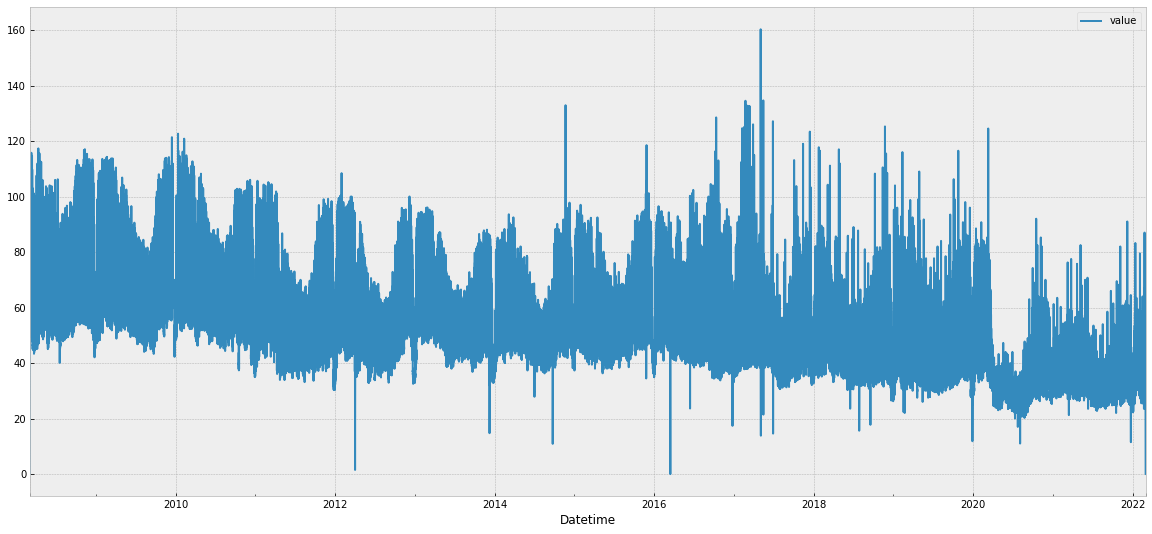

In [21]:
df.plot()

In [22]:
df1 = data.resample(rule='d').mean()

df1.head()

,value
Datetime,
2008-03-03,50.036833
2008-03-04,79.146396
2008-03-05,80.725021
2008-03-06,79.155750
2008-03-07,77.895188


<AxesSubplot:xlabel='Datetime'>

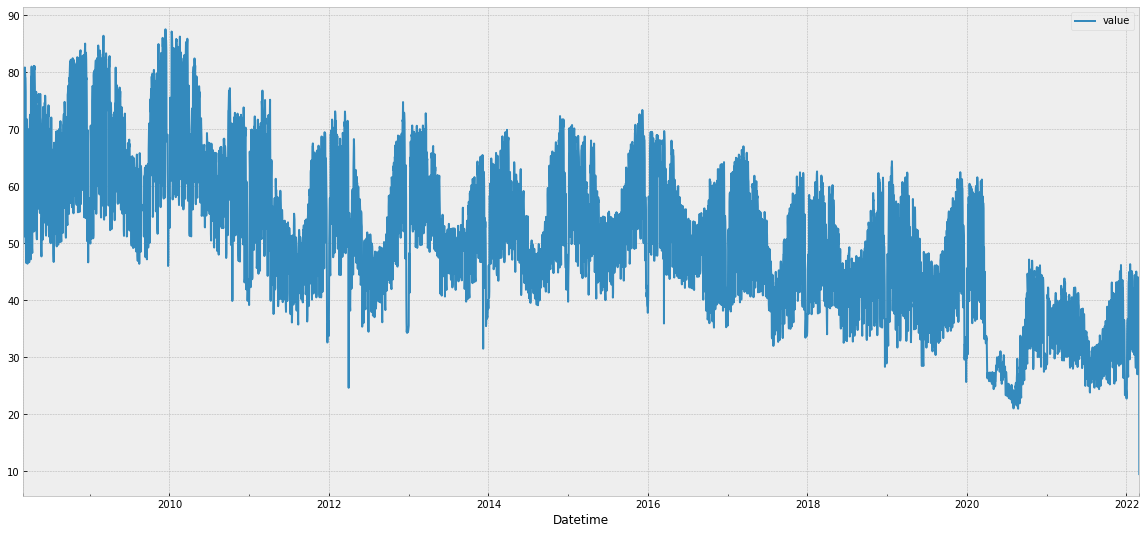

In [23]:
df1.plot()

In [24]:
df['value_next_day'] = df['value'].shift(-1)

In [25]:
df = df.dropna(how='any', axis=0)
df = df.iloc[:-23]
df.tail()

,value,value_next_day
Datetime,,
2022-02-28 19:00:00,41.500,39.125
2022-02-28 20:00:00,39.125,34.500
2022-02-28 21:00:00,34.500,30.875
2022-02-28 22:00:00,30.875,28.875
2022-02-28 23:00:00,28.875,28.375


In [26]:
from sklearn.metrics import *

sc = MinMaxScaler()
scaler = sc.fit_transform(df)

In [43]:
scaler

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.21528861, 0.19266771],
       [0.19266771, 0.18018721],
       [0.18018721, 0.17706708]])

In [45]:
scaler[:, 0]

array([0.        , 0.        , 0.        , ..., 0.21528861, 0.19266771,
       0.18018721])

In [46]:
# y_true = df['value']
# y_pred = df['value_next_day']

y_true = scaler[:, 0]
y_pred = scaler[:, 1]

In [47]:
from sklearn.metrics import *

print('RMSE: ', np.sqrt(mean_squared_error(y_true, y_pred)))
print('MSE: ', mean_squared_error(y_true, y_pred))
print('MAE: ', mean_absolute_error(y_true, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_true, y_pred))
print('R2: ', r2_score(y_true, y_pred)*100)

RMSE:  0.026613762595638937
MSE:  0.0007082923594970301
MAE:  0.015483430708779907
MAPE:  20562420299.398323
R2:  94.38518450307511
